<a href="https://colab.research.google.com/github/sai1519/My-projects-and-programs/blob/Machine-Learning/Saishta's_Assignment_14_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Program 1

## Load the data from “glass.csv” and make a bar plot of different types of glasses.

In [ ]:
# Loading the data
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("glass.csv")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


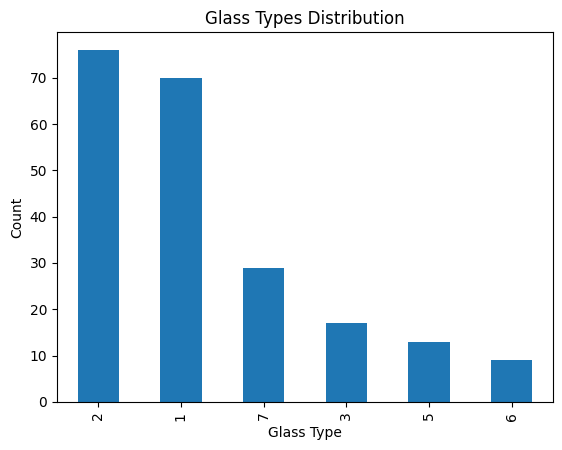

In [ ]:
# Creating a bar plot.
glass_counts =data["Type"].value_counts()
glass_counts.plot(kind ="bar", title="Glass Types Distribution")
plt.xlabel("Glass Type")
plt.ylabel("Count")
plt.show()

# Program 2

## Make a train_test split and fit a single decision tree classifier.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x =data.drop("Type", axis = 1)
y =data["Type"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy of the Decision Tree Classifier: {accuracy:.2f}")

Accuracy of the Decision Tree Classifier: 0.72


# Program 3

## Make a k-fold split with 3 splits and measure the accuracy score with each split
## [Hint: Refer to KFold module under sklearn’s model selection.]

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits =3)

accuracy_scores = []

for train_index, test_index in kf.split(x):
  x_train, x_test =x.iloc[train_index], x.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  clf = DecisionTreeClassifier()
  clf.fit(x_train, y_train)

  y_pred =clf.predict(x_test)

  accuracy = accuracy_score(y_test, y_pred)
  accuracy_scores.append(accuracy)

  for i, score in enumerate(accuracy_scores):
    print(f"Accuracy for split {i+1}: {score:.2f}")

Accuracy for split 1: 0.01
Accuracy for split 1: 0.01
Accuracy for split 2: 0.27
Accuracy for split 1: 0.01
Accuracy for split 2: 0.27
Accuracy for split 3: 0.03


# Program 4

## Use gridSearchCV from sklearn for finding out a suitable number of estimators for a RandomForestClassifer along with a 10-fold cross validation.
## [Hint: Define a range of estimators and feed in range as param_grid]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": [50,100,150,200,250]}

rf_classifier = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rf_classifier, param_grid =param_grid, cv=10)

grid_search.fit(x,y)

print(f"Best Estimator: {grid_search.best_params_['n_estimators']}")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Best Estimator: 200
